In [1]:
from fastai.vision.all import *

In [11]:
path = Path('/Users/abdurahman/Downloads/chest_xray/')
def labeller(file_path):
    if 'virus' in file_path.name:
        return 'viral pneumonia'
    elif 'bacteria' in file_path.name:
        return 'bacterial pneumonia'
    else:
        return 'normal'

In [22]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter= GrandparentSplitter(train_name='train', valid_name='val'),
    batch_tfms=aug_transforms(),
    get_y=labeller,
    item_tfms=Resize(128)
)

dls = dblock.dataloaders(path, device=default_device(1))

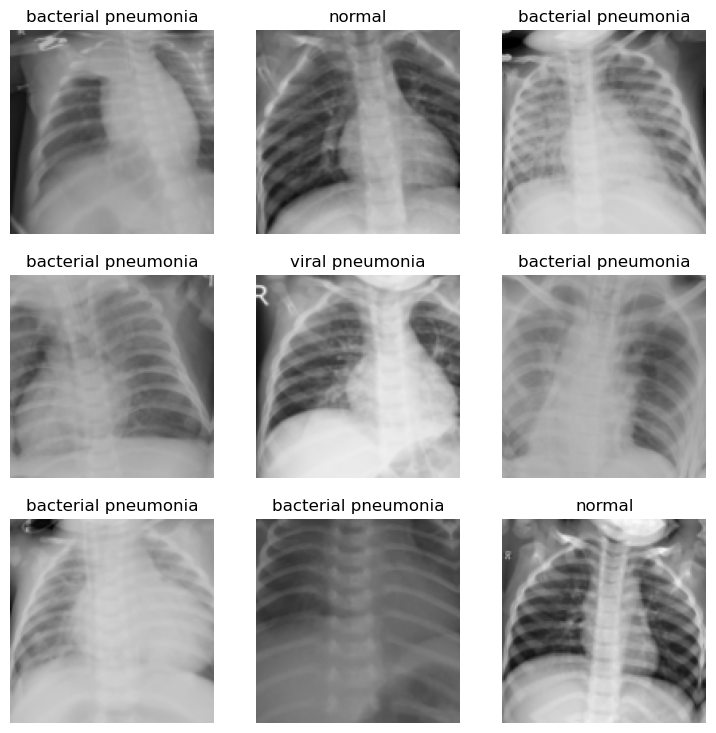

In [14]:
batch = dls.train.one_batch()

dls.train.show_batch(b=batch)

In [23]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/Users/abdurahman/opt/anaconda3/envs/fastai-deeplearning/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/abdurahman/opt/anaconda3/envs/fastai-deeplearning/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/abdurahman/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [18]:
import torch
torch.device("mps")

device(type='mps')